# COVID Datasets

This notebook provides usage examples for Covid data set loaders stored in a python repository.

First step is to install the code.

In [1]:
%pip install git+https://github.com/DELVE-covid19/covid19_datasets.git@cases_dataset

  Cloning https://github.com/DELVE-covid19/covid19_datasets.git (to revision cases_dataset) to /tmp/pip-req-build-mu3lxurg
  Running command git clone -q https://github.com/DELVE-covid19/covid19_datasets.git /tmp/pip-req-build-mu3lxurg
  Running command git checkout -b cases_dataset --track origin/cases_dataset
  Switched to a new branch 'cases_dataset'
  Branch 'cases_dataset' set up to track remote branch 'cases_dataset' from 'origin'.
  Created wheel for covid19-datasets: filename=covid19_datasets-0.1-py3-none-any.whl size=12866 sha256=44d8e158a4911c853676fc172f36a0072ce62c5c046c9925680d4df261a3e579
  Stored in directory: /tmp/pip-ephem-wheel-cache-_xp_9iyz/wheels/56/d5/ea/43c62089d09bfe7ad6336f64eacbc07c3e14d19949aec932ac
Successfully built covid19-datasets
Note: you may need to restart the kernel to use updated packages.


Now some library files for visualising the data. 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Just for info, we include some log messages in this usage notebook to show how the data sets are loading.

In [3]:
# optional - see log messages about datasets loading

import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

# Combined Dataset
Load the combined dataset, made up of data joined from multiple sources

TODO(avishkar): Add some plots

In [4]:
from covid19_datasets import Combined
combined = Combined()

INFO:covid19_datasets.oxford_government_policy:Loading dataset from https://ocgptweb.azurewebsites.net/CSVDownload


/home/andrei/.local/share/virtualenvs/covid-19-ERD70gzE/lib/python3.6/site-packages/pandas_datareader-0.8.1-py3.6.egg/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


INFO:covid19_datasets.oxford_government_policy:Loaded
INFO:covid19_datasets.mask_policies:Loading dataset from https://raw.githubusercontent.com/DELVE-covid19/covid19_datasets/master/data/mask_policy_dates.csv
INFO:covid19_datasets.mask_policies:Loaded
INFO:covid19_datasets.our_world_in_data:Loading dataset from https://covid.ourworldindata.org/data/owid-covid-data.csv
INFO:covid19_datasets.our_world_in_data:Loaded
INFO:covid19_datasets.our_world_in_data:Loading dataset from https://github.com/DELVE-covid19/covid19_datasets/raw/master/data/median-age.csv
INFO:covid19_datasets.world_bank:Loading dataset


In [5]:
#@title View UK Data
combined.get_data().loc['GBR']

,CountryName,School closing,Workplace closing,Cancel public events,Close public transport,Public information campaigns,Restrictions on internal movement,International travel controls,Fiscal measures,Monetary measures,...,physicians (per 1000),nurses (per 1000),"Smoking prevalence, total, ages 15+","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)",Population Density,Population in Urban Agglomerations,Population Female,Population Male,Population
DATE,,,,,,,,,,,,,,,,,,,,,
2020-01-01,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.75,...,2.8058,8.2878,22.3,55.36,86.107,274.827392,17831615.0,33652378.0,32807966.0,66460344.0
2020-01-02,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.75,...,2.8058,8.2878,22.3,55.36,86.107,274.827392,17831615.0,33652378.0,32807966.0,66460344.0
2020-01-03,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.75,...,2.8058,8.2878,22.3,55.36,86.107,274.827392,17831615.0,33652378.0,32807966.0,66460344.0
2020-01-04,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.75,...,2.8058,8.2878,22.3,55.36,86.107,274.827392,17831615.0,33652378.0,32807966.0,66460344.0
2020-01-05,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.75,...,2.8058,8.2878,22.3,55.36,86.107,274.827392,17831615.0,33652378.0,32807966.0,66460344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,United Kingdom,2.0,2.0,2.0,0.0,1.0,2.0,0.0,1.550000e+09,0.10,...,2.8058,8.2878,22.3,55.36,86.107,274.827392,17831615.0,33652378.0,32807966.0,66460344.0
2020-04-21,United Kingdom,2.0,2.0,2.0,0.0,1.0,2.0,0.0,0.000000e+00,0.10,...,2.8058,8.2878,22.3,55.36,86.107,274.827392,17831615.0,33652378.0,32807966.0,66460344.0
2020-04-22,United Kingdom,2.0,2.0,2.0,0.0,1.0,2.0,0.0,0.000000e+00,0.10,...,2.8058,8.2878,22.3,55.36,86.107,274.827392,17831615.0,33652378.0,32807966.0,66460344.0


# Underlying Source Datasets
You can also access the individual source datasets, some of which may not be in the combined dataset yet.

### Oxford Government Policy Tracker

The Oxford Government policy tracker available [here](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker) allows different government responses to Covid19 be loaded in. It can be loaded from the `covid19_datasets` as follows.

In [6]:
from covid19_datasets import OxfordGovernmentPolicyDataset

You can create an instance of the data set by constructing a data set object.

In [7]:
ogp = OxfordGovernmentPolicyDataset()

As an example, we'll look at policy information from South Africa. 

In [8]:
country = 'South Africa'

To share the policies, we'll use `matplotlib` to plot when different policies occured and compare it with epidemic dynamics

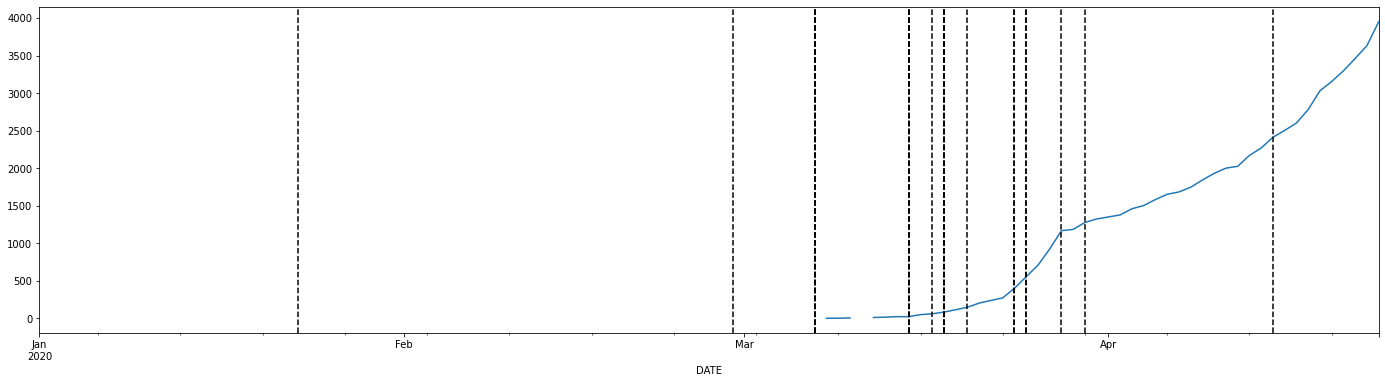

In [9]:
fig, ax = plt.subplots(figsize=(24, 6))
ogp.get_country_data(country).set_index('DATE').ConfirmedCases.plot(ax=ax)

policy_changes = ogp.get_country_policy_changes(country)

for c in policy_changes.columns:
    policy = policy_changes.loc[:, c]
    policy = policy[policy]
    if policy.any():
        for d in policy.index:
            ax.axvline(d, color='k', ls='--')

We can also cycle through the policy changes to print when different changes were made.

In [10]:
for c in policy_changes.columns:
    policy = policy_changes.loc[:, c]
    policy = policy[policy]
    if policy.any():
        for d in policy.index:
            print(f'Policy {c} changed on {d}')

Policy School closing changed on 2020-03-18 00:00:00
Policy Workplace closing changed on 2020-03-15 00:00:00
Policy Workplace closing changed on 2020-03-18 00:00:00
Policy Cancel public events changed on 2020-03-15 00:00:00
Policy Close public transport changed on 2020-03-18 00:00:00
Policy Public information campaigns changed on 2020-03-07 00:00:00
Policy Restrictions on internal movement changed on 2020-03-15 00:00:00
Policy Restrictions on internal movement changed on 2020-03-18 00:00:00
Policy International travel controls changed on 2020-01-23 00:00:00
Policy International travel controls changed on 2020-03-17 00:00:00
Policy Fiscal measures changed on 2020-03-24 00:00:00
Policy Fiscal measures changed on 2020-03-25 00:00:00
Policy Fiscal measures changed on 2020-03-30 00:00:00
Policy Monetary measures changed on 2020-02-29 00:00:00
Policy Monetary measures changed on 2020-03-07 00:00:00
Policy Monetary measures changed on 2020-03-20 00:00:00
Policy Monetary measures changed on 20

### World Bank Data

The world bank provides global development data for individual countries and bigger regions,. Available is data on population, economy, education, etc. More info at https://data.worldbank.org/.

In [11]:
from covid19_datasets import WorldBankDataBank, AGGREGATES

In [12]:
wbdb = WorldBankDataBank()

Here we plot population and population density for 20 most populated countries in the world, using matplotlib. Notice how AGGREGATES that represent world's regions must be dropped from the dataset, to leave only individual countries data.

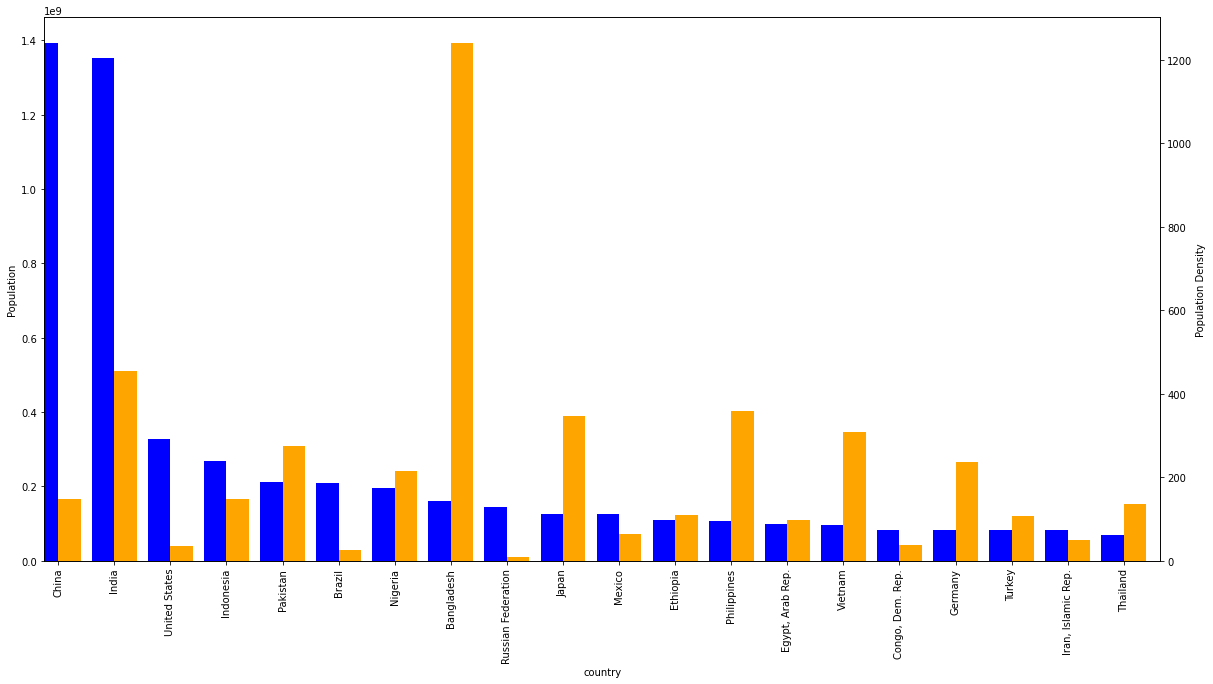

In [13]:
df = wbdb.get_data().set_index('country').drop(AGGREGATES).nlargest(20, "Population")

_, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

df["Population"].plot(kind='bar', color='blue', ax=ax, position=1, width=0.4)
df["Population Density"].plot(kind='bar', color='orange', ax=ax2, position=0, width=0.4)

ax.set_ylabel('Population')
ax2.set_ylabel('Population Density')

plt.show()

### YouGov Behavioural Tracker

YouGov's behavioural tracker conducts surveys in more than 30 countries to understand how COVID-19 and governmental response to it affects human behavior. More info can be found here: https://yougov.co.uk/topics/international/articles-reports/2020/03/17/YouGov-international-COVID-19-tracker. The raw data can be seen in YouGov COVID-19 tracker [github page](https://github.com/YouGov-Data/covid-19-tracker/tree/master/data).

In [14]:
from covid19_datasets import YouGovBehaviouralTracker

In [15]:
ygbt = YouGovBehaviouralTracker()

INFO:covid19_datasets.yougov_behavioural_tracker:Loading dataset
ERROR:covid19_datasets.yougov_behavioural_tracker:ERROR WITH finland
INFO:covid19_datasets.yougov_behavioural_tracker:Loaded


Here we plot information on mask usage statistics.

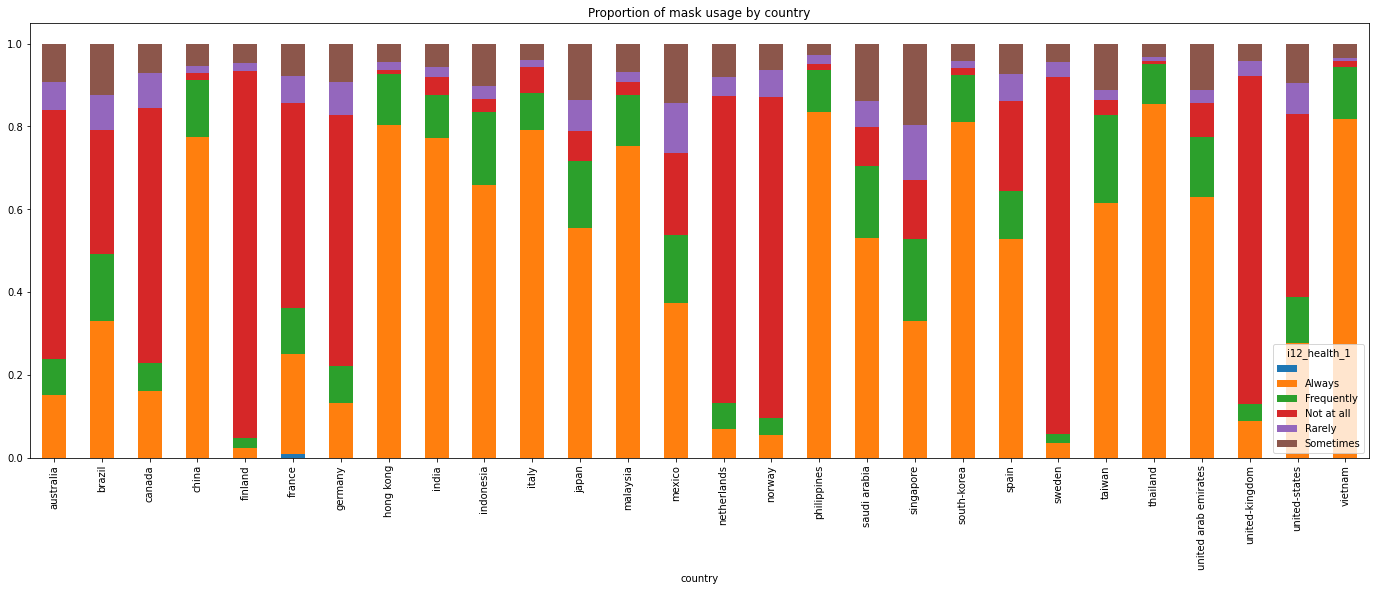

In [16]:
fig, ax = plt.subplots(figsize=(24, 8))
mask_question = 'i12_health_1'
counts = ygbt.data[['country', mask_question, 'RecordNo']].groupby(['country', mask_question]).count().unstack()
normalised_counts = counts.div(counts.sum(axis=1), axis=0)
normalised_counts['RecordNo'].plot(kind='bar', stacked=True, ax=ax)
plt.title('Proportion of mask usage by country');

### ACAPS Government Measures

The ACAPS #COVID19 Government Measures Dataset puts together all the measures implemented by governments worldwide in response to the Coronavirus pandemic. Data collection includes secondary data review.

In [17]:
from covid19_datasets import AcapsGovernmentMeasures

In [18]:
agm = AcapsGovernmentMeasures()

INFO:covid19_datasets.acaps_government_measures:Loading dataset from https://www.acaps.org/sites/acaps/files/resources/files/20200426_acaps_-_covid-19_goverment_measures_dataset_v10.xlsx
INFO:covid19_datasets.acaps_government_measures:No report on 2020-04-26 23:42:16.566374
INFO:covid19_datasets.acaps_government_measures:Loading dataset from https://www.acaps.org/sites/acaps/files/resources/files/20200425_acaps_-_covid-19_goverment_measures_dataset_v10.xlsx
INFO:covid19_datasets.acaps_government_measures:No report on 2020-04-25 23:42:16.566374
INFO:covid19_datasets.acaps_government_measures:Loading dataset from https://www.acaps.org/sites/acaps/files/resources/files/20200424_acaps_-_covid-19_goverment_measures_dataset_v10.xlsx
INFO:covid19_datasets.acaps_government_measures:No report on 2020-04-24 23:42:16.566374
INFO:covid19_datasets.acaps_government_measures:Loading dataset from https://www.acaps.org/sites/acaps/files/resources/files/20200419_acaps_-_covid-19_goverment_measures_datas

We can see all categories of interventions, and all individual measures

In [19]:
print("Intervention categories: \n  * " + '\n  * '.join(agm.get_intervention_categories()))
print()
print("Individual measures: \n  * " + '\n  * '.join(agm.get_measures()))

Intervention categories: 
  * Public health measures
  * Governance and socio-economic measures
  * Social distancing
  * Movement restrictions
  * Lockdown
  * Humanitarian exemption

Individual measures: 
  * Health screenings in airports and border crossings
  * Introduction of isolation and quarantine policies
  * Awareness campaigns
  * Emergency administrative structures activated or established
  * Limit public gatherings
  * Border closure 
  * Schools closure 
  * Strengthening the public health system
  * Limit product imports/exports
  * Border checks 
  * International flights suspension
  * Surveillance and monitoring
  * Other public health measures enforced
  * Domestic travel restrictions
  * State of emergency declared
  * General recommendations
  * Partial lockdown
  * Checkpoints within the country
  * Economic measures
  * Curfews
  * Changes in prison-related policies
  * Public services closure 
  * Military deployment
  * Full lockdown
  * Visa restrictions
  * 

As a simple usage example, we can plot the number of countries that has introduced some form of lockdown vs the number of countries that didn't.

In [20]:
lockdown_countries_count = agm.get_data()[agm.get_data().MEASURE.str.contains("lockdown")].COUNTRY.unique().shape[0]
total_countries = agm.get_data().COUNTRY.unique().shape[0]
no_lockdown_countries_count = total_countries - lockdown_countries_count

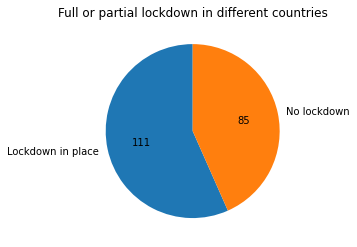

In [21]:
plt.pie([lockdown_countries_count, no_lockdown_countries_count], labels=['Lockdown in place', 'No lockdown'],
        autopct = lambda p: '{:.0f}'.format(p * total_countries / 100), startangle=90);
plt.title('Full or partial lockdown in different countries');

### Our World in Data
Our World in Data collects data on the number of Covid-19 tests performed in multiple countries. They join this with case and death data from the European CDC. Conveniently they also provide cases and test counts normalised by population. See https://ourworldindata.org/coronavirus for more information.

In [22]:
from covid19_datasets import OWIDCovid19

In [23]:
owid = OWIDCovid19()

Example plot of cases vs tests for selected countries

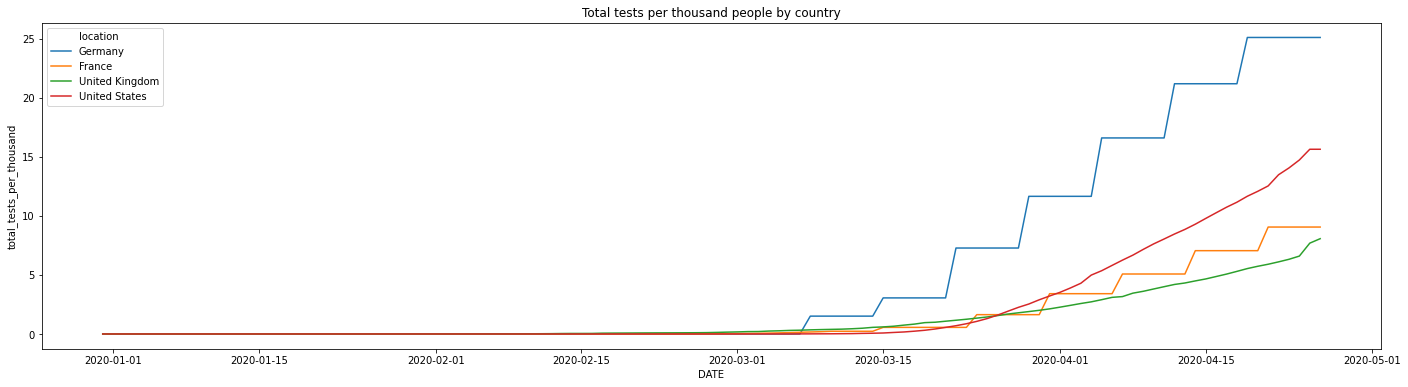

In [24]:
fig, ax = plt.subplots(figsize=(24, 6))
countries = ['United States', 'United Kingdom', 'France', 'Germany']
plot_data = owid.get_data()
plot_data = plot_data[plot_data.location.isin(countries)]
sns.lineplot(data=plot_data, x='DATE', y='total_tests_per_thousand', hue='location')
plt.title('Total tests per thousand people by country');

### UK cases data

NHS provided data on daily cases of COVID-19 registered in different areas of the UK. So far we support England and Wales, Scotland and NI to be added later.

In [25]:
from covid19_datasets import UKCovid19Data
uk_data = UKCovid19Data()

INFO:covid19_datasets.uk_area_stats:Loading dataset from https://c19downloads.azureedge.net/downloads/csv/coronavirus-cases_latest.csv
INFO:covid19_datasets.uk_area_stats:Loaded
INFO:covid19_datasets.uk_area_stats:Loading dataset from http://www2.nphs.wales.nhs.uk:8080/CommunitySurveillanceDocs.nsf/61c1e930f9121fd080256f2a004937ed/77fdb9a33544aee88025855100300cab/$FILE/Rapid%20COVID-19%20surveillance%20data.xlsx
INFO:covid19_datasets.uk_area_stats:Loaded


As an example we are going to plot a daily statistics from York

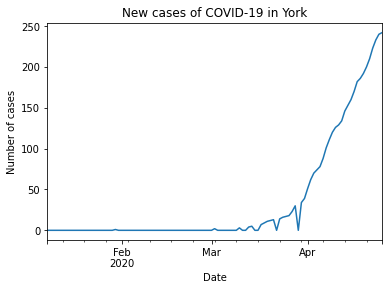

In [36]:
uk_cases = uk_data.get_cases_data()
uk_cases.loc[('England', 'York')].plot()
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title('New cases of COVID-19 in York');